In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt


In [2]:
#Get the path of the file
import os
os.chdir("D:\dev_skill_project2")
os.getcwd()

'D:\\dev_skill_project2'

In [3]:
#Read the CSV file
column_read=["Fruits","Season_month", "Current_month", "Disaster Happen in last 3 month", "Fruits on season or not", "Fruits Condition","Price have to be","Current Price","Price in Limit"]
dataset = pd.read_csv("project2Fruits_DataSet2.csv", usecols=column_read)

['Mango' 'Guava' 'Banana' 'Jackfruit' 'Litchis ']
Mango        10
Banana        7
Litchis       6
Jackfruit     5
Guava         3
Name: Fruits, dtype: int64


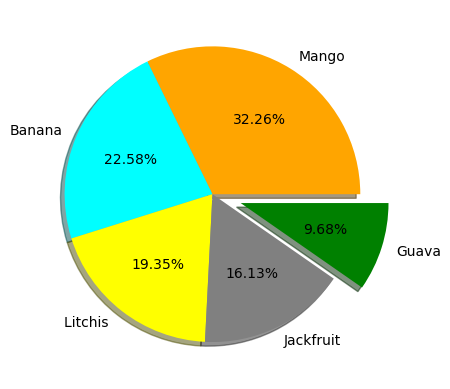

In [4]:
fruit_name = dataset["Fruits"].unique()
print(fruit_name)
print(dataset["Fruits"].value_counts())

#visualize fruits present in the dataset
colors = ( "orange", "cyan", "yellow","grey", "green",)
explode_fruit = [0,0, 0, 0, 0.2]
dataset["Fruits"].value_counts().plot.pie(autopct='%1.2f%%',colors=colors, shadow=True,explode=explode_fruit, ylabel="")
plt.show()

C:\Users\CB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


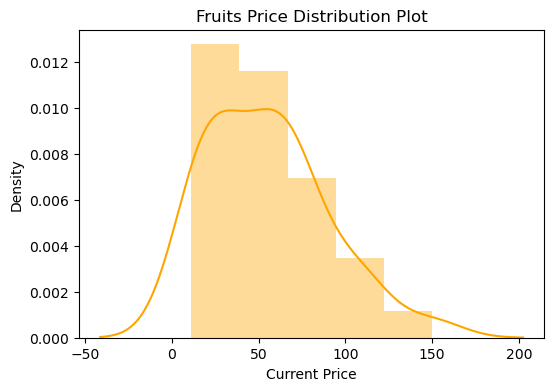

In [7]:
#Visualize price
import seaborn as sns
plt.figure(figsize=(6,4))

plt.title('Fruits Price Distribution Plot')
sns.distplot(dataset["Current Price"], color="orange", label="SUV")
plt.show()

In [8]:
#convert the text data to dummies
def get_dummies(dataset_name, name):

    dummies = pd.get_dummies(dataset_name[name])
    new_dataset = pd.concat([dataset_name,dummies], axis='columns')
    new_dataset = new_dataset.drop(name, axis='columns')
    
    return new_dataset


new_dataset_ = get_dummies(dataset, "Season_month")
new_dataset_ = get_dummies(new_dataset_,"Current_month")
new_dataset_ = get_dummies(new_dataset_,"Fruits Condition")
new_dataset_ = get_dummies(new_dataset_,"Fruits")
new_dataset_.head(5)

,Disaster Happen in last 3 month,Fruits on season or not,Price have to be,Current Price,Price in Limit,august-october,july-october,june-august,june-july,may-june,...,November,October,September,Fresh,Preserved,Banana,Guava,Jackfruit,Litchis,Mango
0,0,1,30,30,Yes,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,39,30,Yes,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,10,15,No,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,110,110,Yes,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,70,70,Yes,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#Selecting Training Features and target value
x= new_dataset_.drop("Price in Limit", axis='columns')
y= new_dataset_["Price in Limit"]

#Label Encoding- target data
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

#split the dataset for classification purpose
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=2)

In [ ]:
#For Price Prediction 
x_p = new_dataset_.drop(["Current Price", "Price in Limit"], axis="columns")
y_p = new_dataset_["Current Price"]

#normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_x=scaler.fit_transform(x_p)

#train test split
x_train_p,x_test_p,y_train_p,y_test_p= train_test_split(x_p,y_p,test_size=0.25, random_state=2)

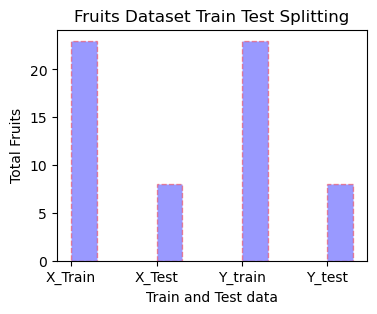

In [15]:
#visialization of training and testing data

# initializing the data
x_name= ["X_Train", "X_Test", "Y_train", "Y_test"]
y_data= [x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0]]


# plotting the data
plt.figure(figsize=(4,3))
plt.bar(x_name,y_data, width=0.3,align='edge', color='Blue', edgecolor='red',linestyle='--', alpha=0.4)

plt.title("Fruits Dataset Train Test Splitting")
plt.ylabel('Total Fruits')
plt.xlabel('Train and Test data')
 
plt.show()

In [ ]:
#To show confusion matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.metrics import classification_report 

def plot(y_test,y_predict):
    
    labels = unique_labels(y_test)
    colum = [f'Predicted {label}' for label in labels]
    indc = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(metrics.confusion_matrix(y_test,y_predict), columns= colum, index=indc)
    
    plt.figure(figsize=(4,3))
    sns.set(font_scale=1.4)
    return sns.heatmap(table,annot=True,fmt='d',cbar=False,cmap=plt.cm.GnBu)



def accuracy_class_report (y_test,y_predict,file_name):
    
    accuracy_value =(metrics.accuracy_score(y_test,y_predict))*100
    print("accuracy: %0.3f%%"%accuracy_value)
    
    report_dict = metrics.classification_report(y_test, y_predict, output_dict=True, zero_division=0)
    classification_report=pd.DataFrame(report_dict)
    classification_report.to_csv(file_name)      #Storing Classificaiton report into a CSV file
    print(metrics.classification_report(y_test, y_predict, zero_division=0))
    plot(y_test, y_predict)
    
    

In [64]:
#linear Regression model for price prediction
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(x_train_p,y_train_p)
LR_predict = lm.predict(x_test_p)

actual_value = y_test_p.tolist()  #converting Dataframe to list
predicted_value =LR_predict.tolist()

actual= ["Actual"] + actual_value
prdicted =["Predicted"] + predicted_value

compare_actual_predict = dict(zip(actual, prdicted))

compare_actual_predict


{'Actual': 'Predicted',
 12: 29.79592323981141,
 30: 41.98151044443541,
 45: 66.66174921599769,
 14: 76.10576138344351,
 11: -1.0938370575503953,
 65: 68.8847182350961,
 22: 3.3779468683339715}

accuracy: 100.000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



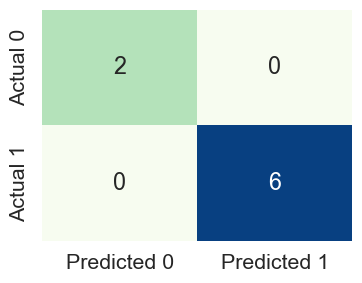

In [65]:
#check price is in limit or not
#apply Classificaiton Algorithm logistic regression 
from sklearn.linear_model import LogisticRegression

logiRegression = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter=400,random_state=2)
logiRegression.fit(x_train,y_train)
predictlr = logiRegression.predict(x_test)


accuracy_class_report(y_test, predictlr,"lr_report.csv") 


In [66]:
#find the number of feature we need to give to predict price in limit or not
x_train_column =[]
for col in x_train.columns:
    x_train_column.append(col)
print(x_train_column )

['Disaster Happen in last 3 month', 'Fruits on season or not', 'Price have to be', 'Current Price', 'august-october', 'july-october', 'june-august', 'june-july', 'may-june', 'August', 'December', 'January', 'July', 'June', 'May', 'November', 'October', 'September', 'Fresh', 'Preserved', 'Banana', 'Guava', 'Jackfruit', 'Litchis ', 'Mango']


In [67]:
# value that we have to give
x_train_column = ['Disaster Happen in last 3 month', 'Fruits on season or not', 
                  'Price have to be', 'Current Price', 'august-october', 'july-october', 
                  'june-august', 'june-july', 'may-june', 'August', 'December', 'January', 
                  'July', 'June', 'May', 'November', 'October', 'September', 'Fresh',
                  'Preserved', 'Banana', 'Guava', 'Jackfruit', 'Litchis ', 'Mango']

# we wants to predict price in limit or not 
# Mango=1, disaster happen=1, Fruits in season=1, price have to be=40, current price= 30,
# mango_season = june-august=1, current month = july=1, others value is zero

given_value = [[1,1,40,30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1]]
x_predcit = pd.DataFrame (given_value, columns = x_train_column)
lrPredict=logiRegression.predict(x_predcit)

if lrPredict[0]==1:
    print("Yes")
else:
    print("No")

Yes
